# Winery classification

The **Wine** data set is the running example for our discussion of the *generative approach to classification*. 

The data can be downloaded from the UCI repository (https://archive.ics.uci.edu/ml/datasets/wine). It contains 178 labeled data points, each corresponding to a bottle of wine:
* The features (`x`): a 13-dimensional vector consisting of visual and chemical features for the bottle of wine
* The label (`y`): the winery from which the bottle came (1,2,3)

Before continuing, download the data set and place it in the same directory as this notebook.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

from pycaret.classification import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280/OD315ofdilutedwines,Proline,Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Alcohol                    178 non-null    float64
 1   Malicacid                  178 non-null    float64
 2   Ash                        178 non-null    float64
 3   Alcalinityofash            178 non-null    float64
 4   Magnesium                  178 non-null    int64  
 5   Totalphenols               178 non-null    float64
 6   Flavanoids                 178 non-null    float64
 7   Nonflavanoidphenols        178 non-null    float64
 8   Proanthocyanins            178 non-null    float64
 9   Colorintensity             178 non-null    float64
 10  Hue                        178 non-null    float64
 11  OD280/OD315ofdilutedwines  178 non-null    float64
 12  Proline                    178 non-null    int64  
 13  Label                      178 non-null    int64  

In [5]:
df.describe(include='all')

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280/OD315ofdilutedwines,Proline,Label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
df.shape

(178, 14)

In [7]:
df.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinityofash', 'Magnesium',
       'Totalphenols', 'Flavanoids', 'Nonflavanoidphenols', 'Proanthocyanins',
       'Colorintensity', 'Hue', 'OD280/OD315ofdilutedwines', 'Proline',
       'Label'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

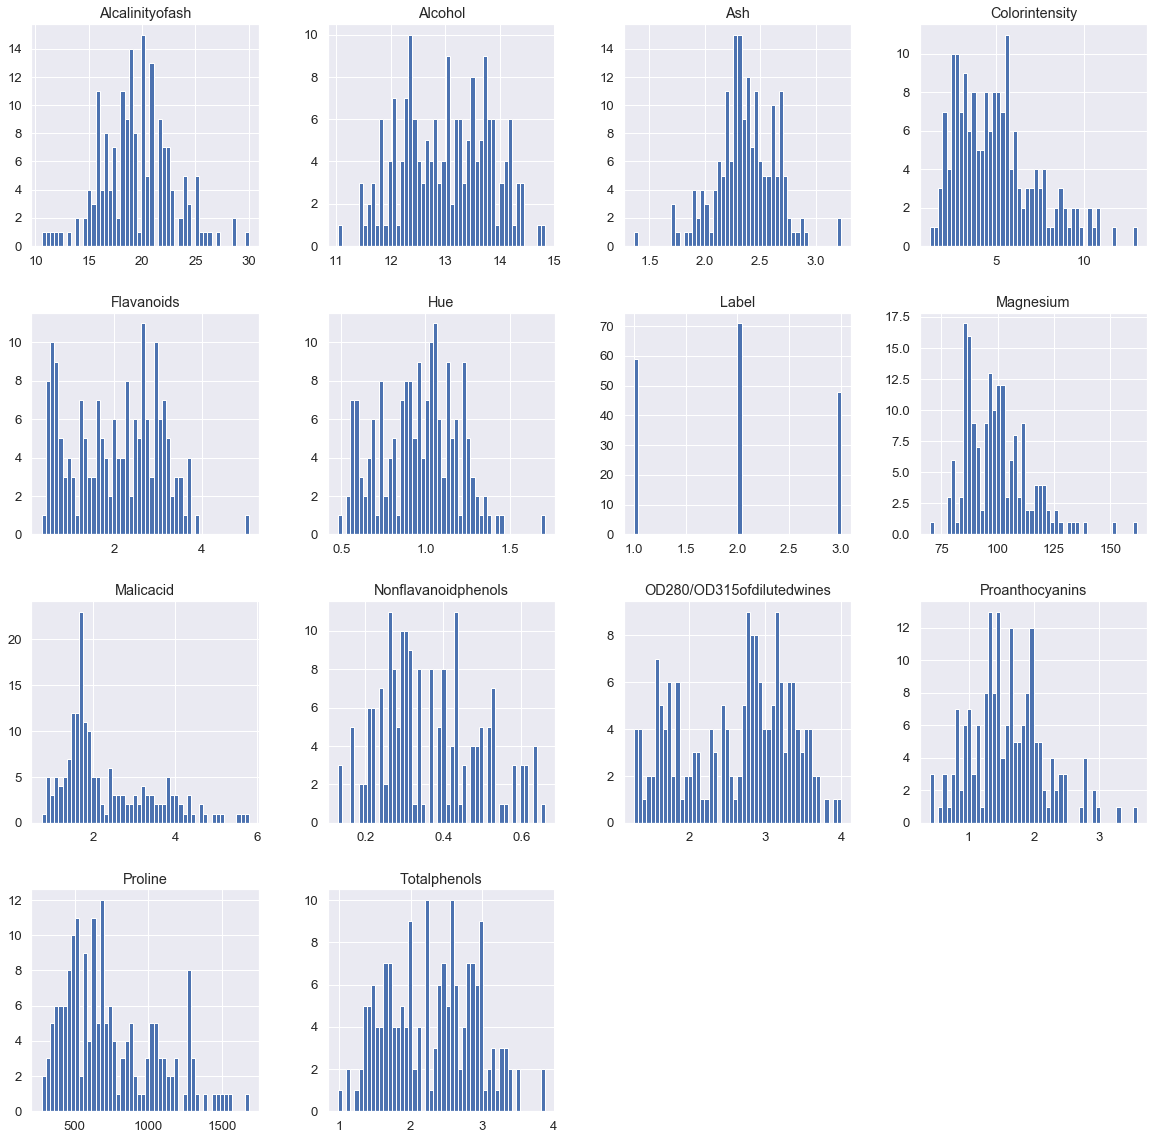

In [8]:
df.hist(bins=50, figsize=(20,20));

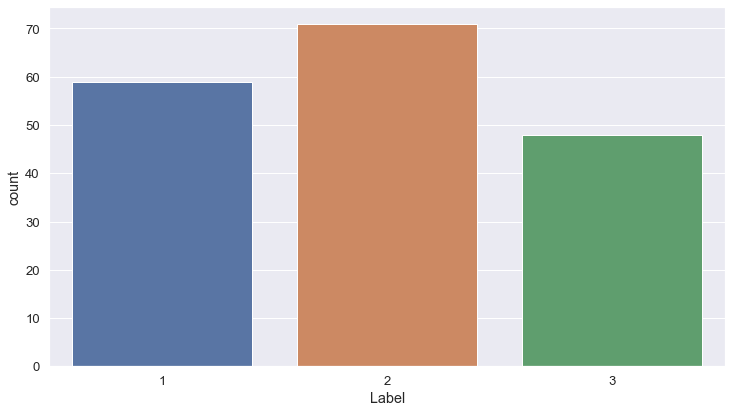

In [9]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(df.Label)

plt.tight_layout()
plt.show()

In [10]:
df.corr()

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280/OD315ofdilutedwines,Proline,Label
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malicacid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinityofash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Totalphenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoidphenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Colorintensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


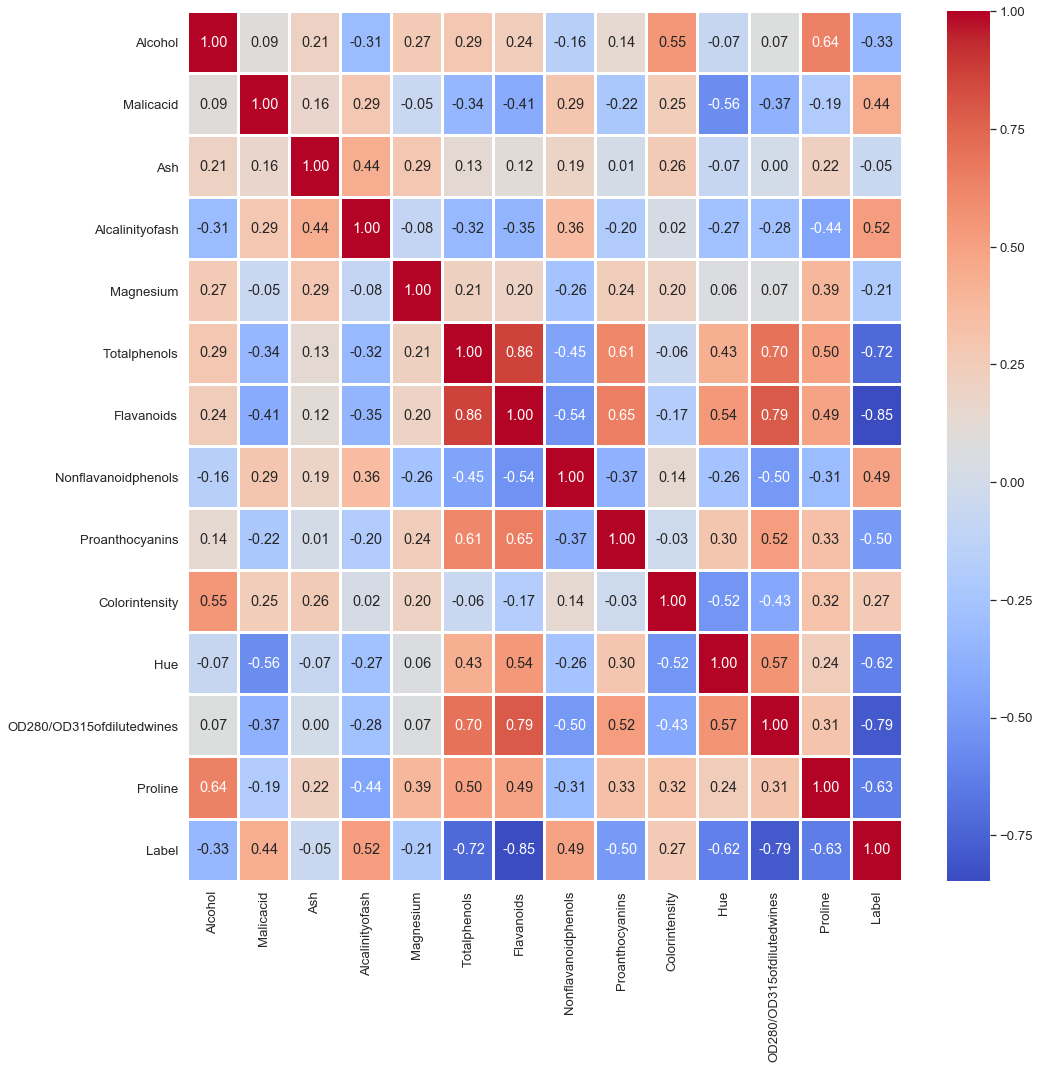

In [11]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

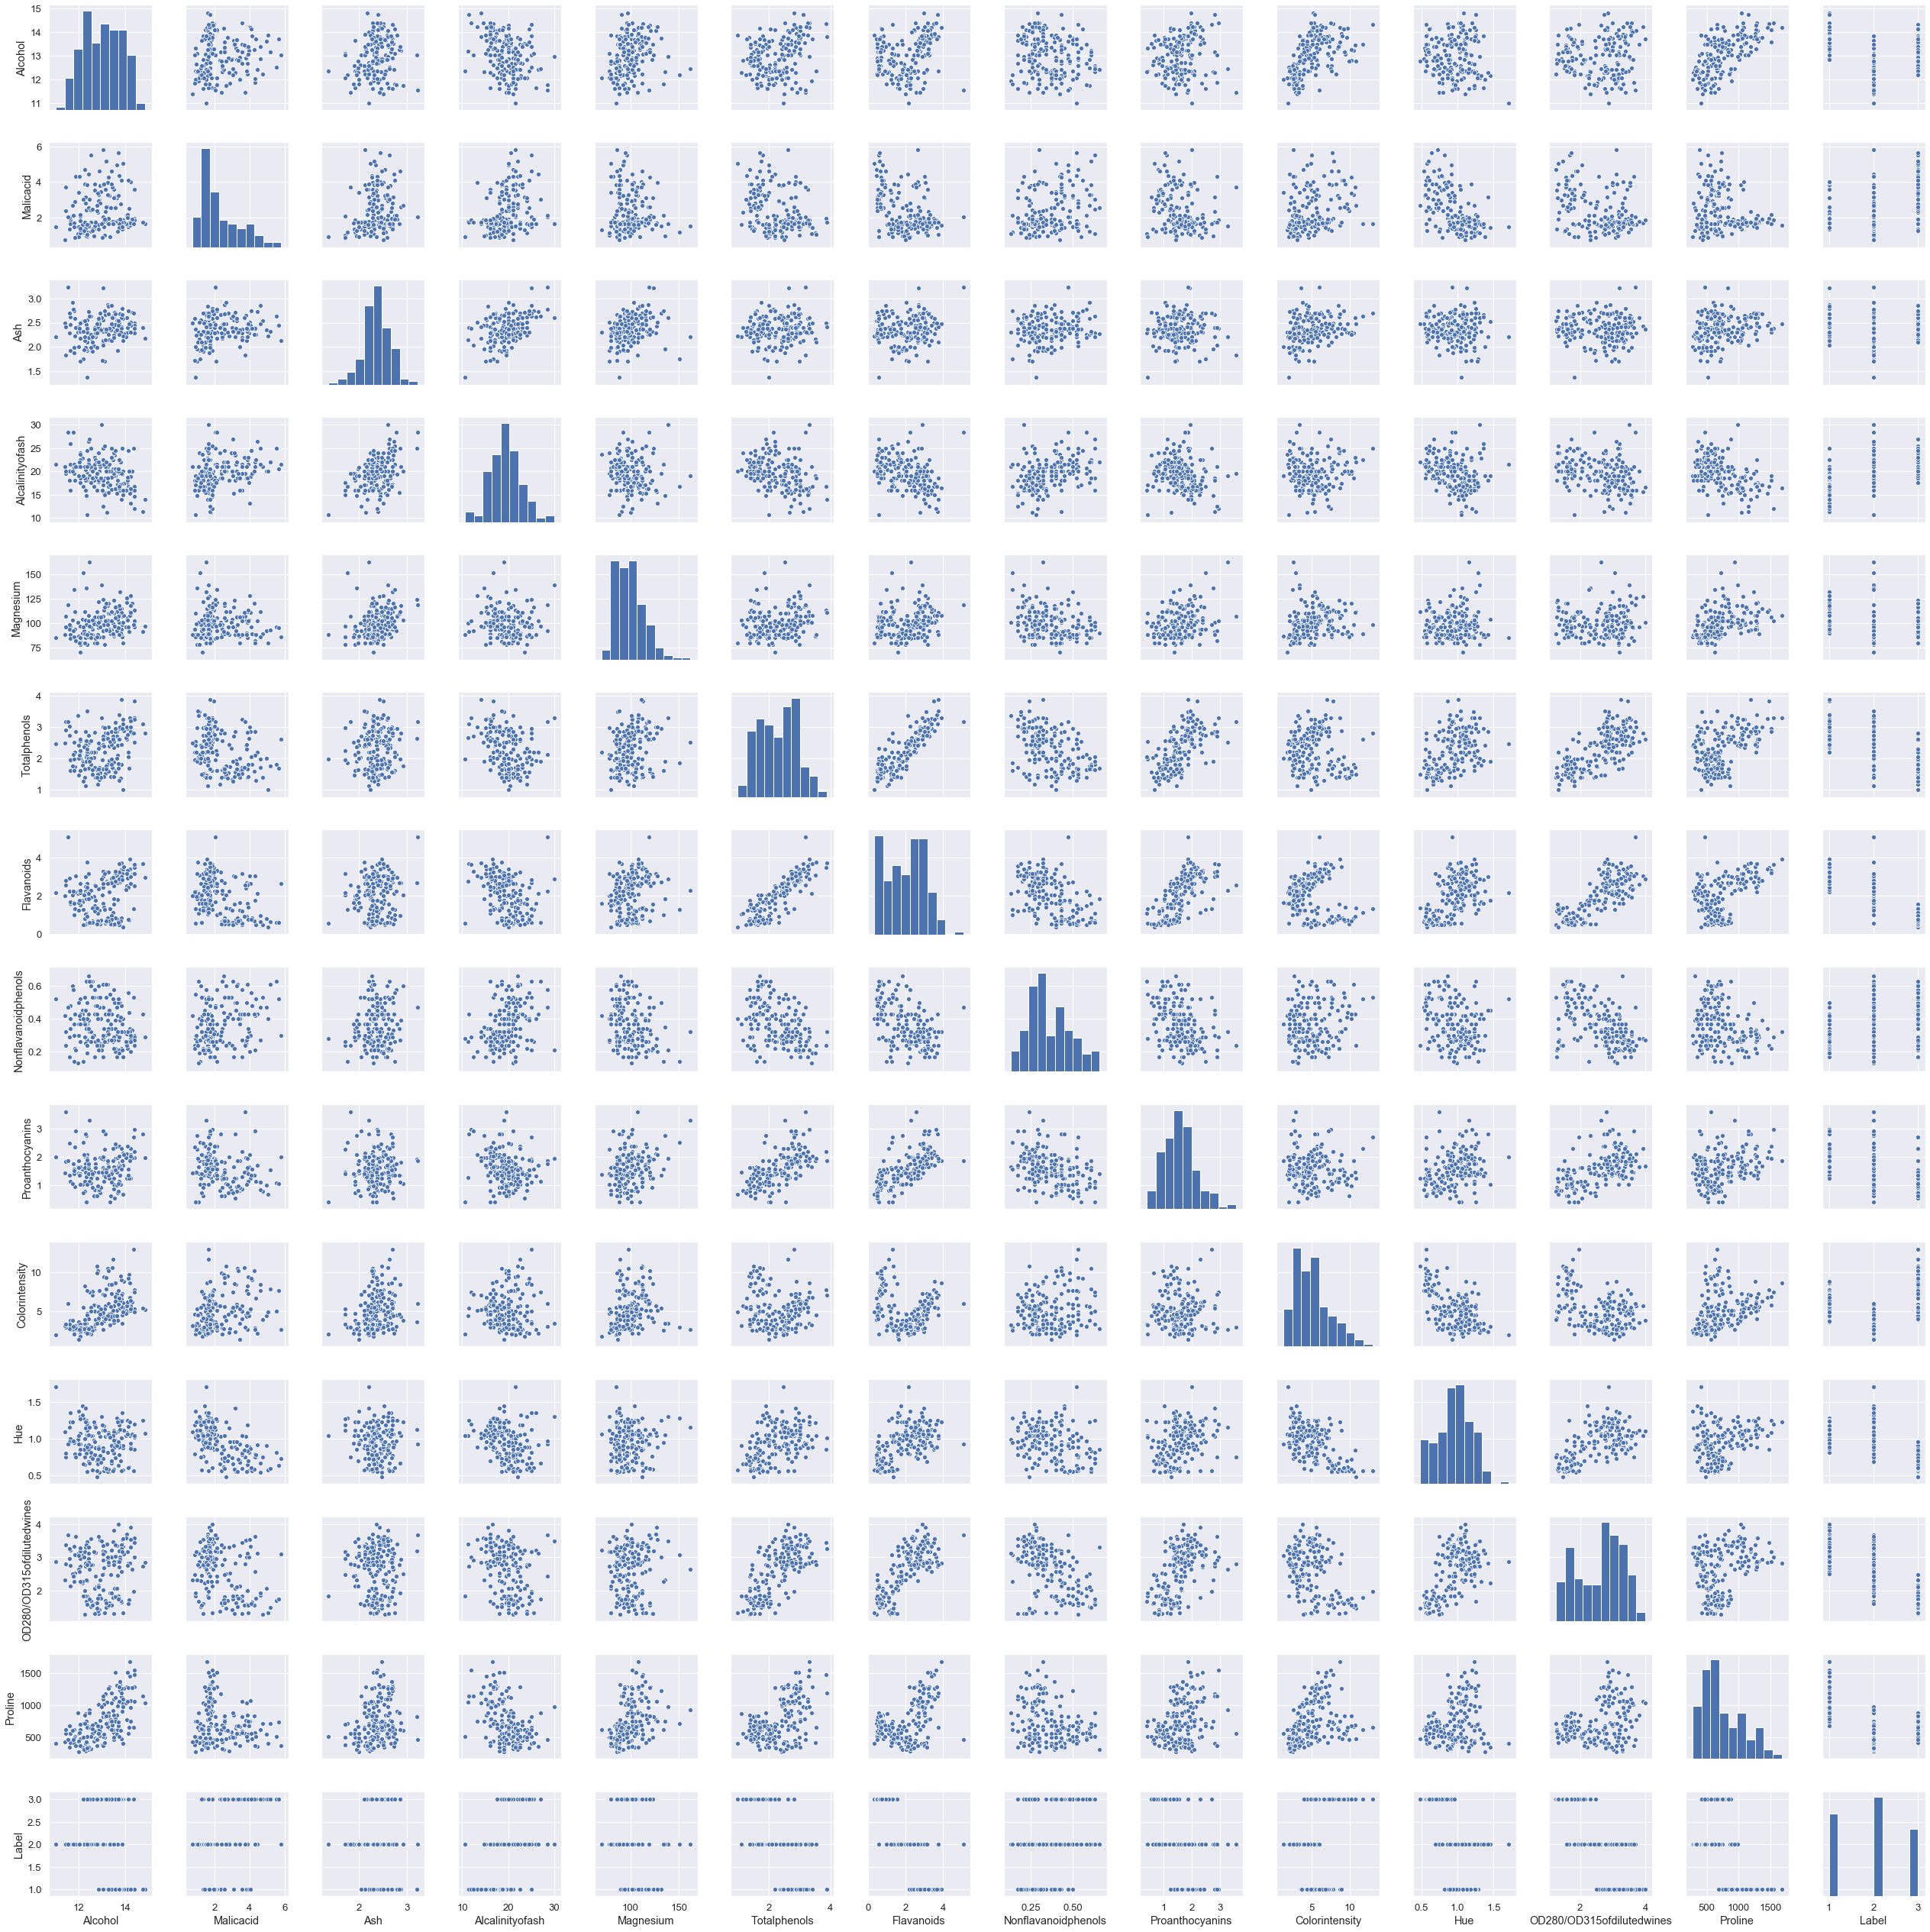

In [12]:
sns.pairplot(df)
plt.show()

### Treat Missing Values

In [13]:
df.isnull().sum()

Alcohol                      0
Malicacid                    0
Ash                          0
Alcalinityofash              0
Magnesium                    0
Totalphenols                 0
Flavanoids                   0
Nonflavanoidphenols          0
Proanthocyanins              0
Colorintensity               0
Hue                          0
OD280/OD315ofdilutedwines    0
Proline                      0
Label                        0
dtype: int64

### Model Training

### Using PyCaret

In [14]:
exp_class = setup(data = df, target = 'Label', session_id=123, normalize=True, train_size=0.8) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(178, 14)"
4,Missing Values,False
5,Numeric Features,13
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1,Quadratic Discriminant Analysis,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2,Linear Discriminant Analysis,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3,Logistic Regression,0.992900,0.000000,0.993300,0.994300,0.992900,0.989300
4,Extra Trees Classifier,0.992900,0.000000,0.993300,0.994300,0.992900,0.989300
5,SVM - Linear Kernel,0.985700,0.000000,0.986700,0.988100,0.985600,0.978500
6,CatBoost Classifier,0.985700,0.000000,0.987800,0.988600,0.985800,0.978500
7,Extreme Gradient Boosting,0.978600,0.000000,0.979400,0.981400,0.978500,0.967400
8,K Neighbors Classifier,0.971400,0.000000,0.972800,0.977000,0.970400,0.956900
9,Naive Bayes,0.971400,0.000000,0.974400,0.978400,0.970900,0.957000


In [16]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0
5,1.0,0.0,1.0,1.0,1.0,1.0
6,1.0,0.0,1.0,1.0,1.0,1.0
7,1.0,0.0,1.0,1.0,1.0,1.0
8,1.0,0.0,1.0,1.0,1.0,1.0
9,1.0,0.0,1.0,1.0,1.0,1.0


In [17]:
print(ridge)

OneVsRestClassifier(estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=None, normalize=False,
                                              random_state=123, solver='auto',
                                              tol=0.001),
                    n_jobs=None)


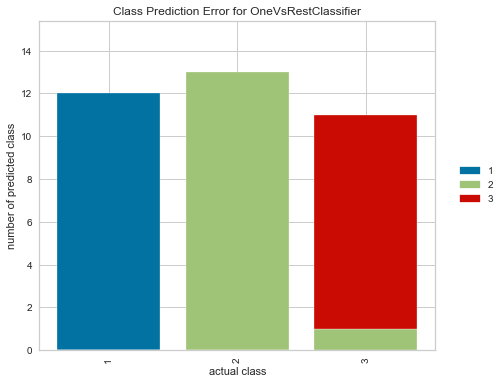

In [18]:
plot_model(ridge, plot = 'error')

In [19]:
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [20]:
predict_model(ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.9722,0,0.9762,0.9747,0.9724,0.9581


,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280/OD315ofdilutedwines,Proline,Label,Label
0,-0.408401,-1.217544,-0.462462,-0.448909,-0.052068,-0.152402,-0.089624,-0.498407,-0.229346,-1.054644,1.195772,0.774463,-0.945455,2,2
1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1,1
2,-1.964835,-1.432983,0.487926,0.451946,-0.824415,0.296251,-0.019346,0.468530,-0.264388,-0.855662,0.625418,-0.426113,-0.996407,2,2
3,-0.519575,-0.939268,-0.974210,0.151661,0.228785,-1.306080,-1.455019,1.354888,-0.334471,1.099554,-1.655999,-1.499570,-0.340401,3,3
4,-0.371343,1.089450,-0.023821,0.602088,0.439425,-0.953567,-0.832559,-1.545922,-1.315638,-0.025128,-0.778531,-1.866805,-0.467781,3,3
5,1.493907,1.529305,0.268606,-0.178653,0.790492,0.889114,0.623193,-0.498407,-0.597284,0.078689,-0.383670,1.014578,1.060776,1,1
6,-0.816038,0.102021,0.341713,0.451946,-0.122282,0.424438,0.081051,-0.176095,-0.492158,-0.976782,-0.690784,1.085200,-0.983669,2,2
7,-0.964270,-0.939268,-1.559065,-0.148624,-0.543562,0.103972,0.010773,0.226796,0.856946,-1.020039,-0.427544,0.576721,-1.384915,2,2
8,-0.013116,-0.598156,0.853460,3.154511,2.756465,1.610163,0.864145,-1.223610,0.646696,-0.738868,1.546759,1.254694,0.758249,2,2
9,0.629222,-0.481460,1.036228,-0.148624,0.720278,0.087948,0.502717,-0.578985,-0.089179,-0.371184,0.625418,0.364855,1.108544,1,1
